# Generate Rank-Rank Hypergeometric Overlap (RRHO) plots

In [1]:
library(RRHO)
library(dplyr)
library(lattice)

Loading required package: grid


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [39]:
get_deg_df <- function(sex, tissue){
    if(tolower(sex) == 'female'){
        fn = paste0("../../../", tolower(tissue),"/female_analysis/_m/genes/diffExpr_szVctl_full.txt")
    } else {
        fn = paste0("../../../", tolower(tissue),"/male_analysis/_m/genes/diffExpr_szVctl_full.txt")
    }
    if(tolower(tissue) == 'cmc_dlpfc'){
        df = data.table::fread(fn) %>% mutate(metric=-log10(P.Value)*sign(t), gencodeID=gene_id) %>% 
            select('gencodeID', 'metric')
    } else {
        df = data.table::fread(fn) %>% mutate(metric=-log10(P.Value)*sign(t)) %>% 
            select('gencodeID', 'metric')
    }
    return(df)
}


within_tissue_rrho_plot <- function(tissue){
    defaultW <- getOption("warn") 
    options(warn = -1) 
    f.list = get_deg_df('female', tolower(tissue)) %>% distinct(gencodeID, .keep_all = TRUE) 
    m.list = get_deg_df('male', tolower(tissue)) %>% distinct(gencodeID, .keep_all = TRUE) 
    rrho_df <- RRHO(f.list, m.list, BY=TRUE, labels=c("Female", "Male"), 
                    alternative='enrichment', log10.ind=TRUE)
    rrho_df$hypermat[is.na(rrho_df$hypermat)] <- 0 # for NA, correct to 0
    options(warn = defaultW)
    plt = levelplot(rrho_df$hypermat, col.regions=viridis::viridis(100), 
                    xlab="Female", ylab="Male", at=seq(0, 1000, 100))
    print(plt)
    label = paste("rrho_sex_compare", tolower(tissue), sep='_')
    R.devices::devEval(c("pdf", "png"), name=label, print(plt))
    #return(rrho_df)
}


## Within tissue comparison

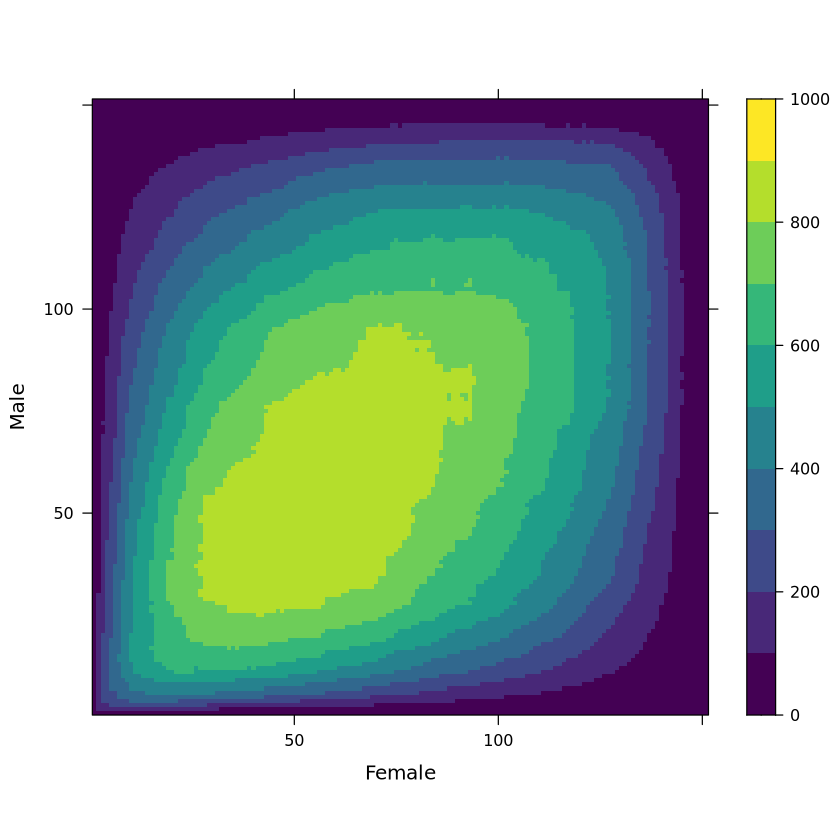

ERROR: Error in RRHO(f.list, m.list, BY = TRUE, labels = c("Female", "Male"), : Non-unique gene identifier found in list1


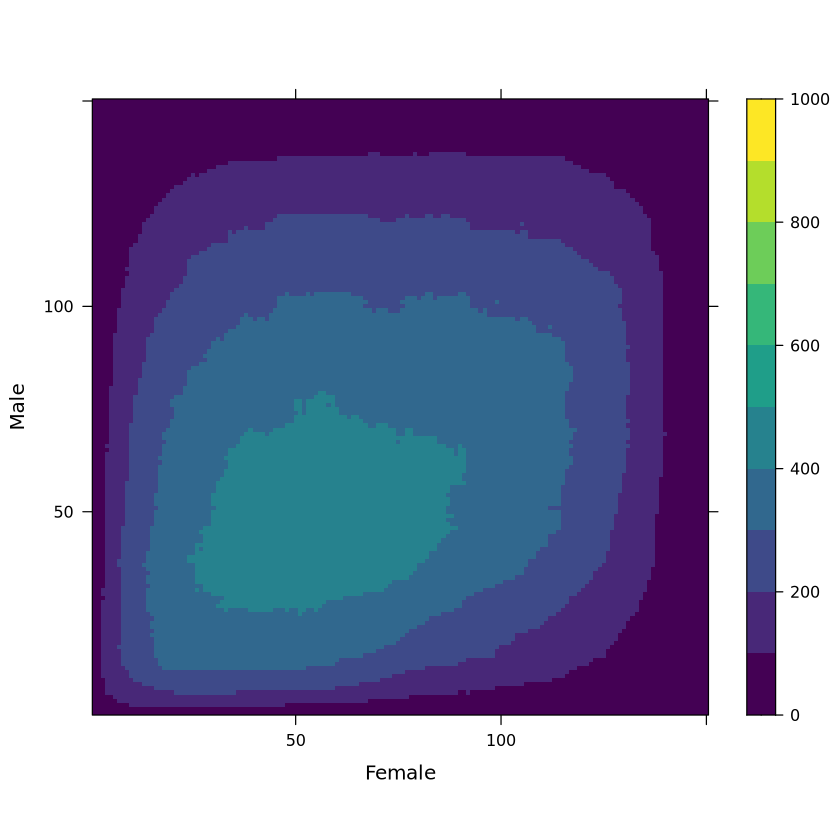

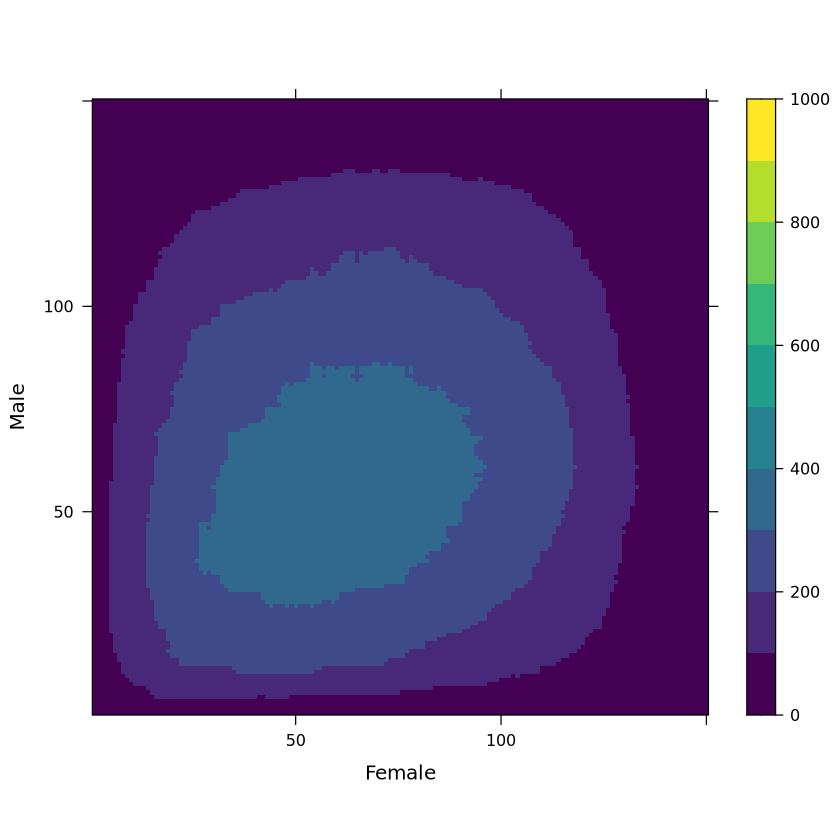

In [4]:
for(tissue in c('caudate', 'dlpfc', 'hippocampus', 'cmc_dlpfc')){
    within_tissue_rrho_plot(tissue)
}

## Female comparison across tissues

In [36]:
compare_tissue_plot <- function(sex, tissue1, tissue2){
    list1 = get_deg_df(sex, tissue1) %>% distinct(gencodeID, .keep_all = TRUE) 
    list2 = get_deg_df(sex, tissue2) %>% distinct(gencodeID, .keep_all = TRUE) 
    gene_overlap = intersect(list1$gencodeID, list2$gencodeID)
    list1 = list1 %>% filter(gencodeID %in% gene_overlap)
    list2 = list2 %>% filter(gencodeID %in% gene_overlap)
    rrho_df <- RRHO(list1, list2, BY=TRUE, labels=c(tissue1, tissue2), 
                   alternative='enrichment', log10.ind=TRUE)
    rrho_df$hypermat[is.na(rrho_df$hypermat)] <- 0 # for NA, correct to 0
    rrho_plot = levelplot(rrho_df$hypermat, col.regions=viridis::viridis, 
                          xlab=tissue1, ylab=tissue2, at=seq(0, 800, 100))
    R.devices::devEval(c("pdf", "png"), 
                       name=paste("rrho",sex,tissue1,tissue2, sep='_'), 
                       print(rrho_plot))
}

### Female

In [37]:
compare_tissue_plot("female", "Caudate", "DLPFC")
compare_tissue_plot("female", "Caudate", "Hippocampus")
compare_tissue_plot("female", "DLPFC", "Hippocampus")

In [40]:
compare_tissue_plot("female", "CMC_DLPFC", "Caudate")
compare_tissue_plot("female", "CMC_DLPFC", "DLPFC")
compare_tissue_plot("female", "CMC_DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_female_CMC_DLPFC_Caudate.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_Caudate.png"

$pdf
[1] "figures/rrho_female_CMC_DLPFC_DLPFC.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_DLPFC.png"

$pdf
[1] "figures/rrho_female_CMC_DLPFC_Hippocampus.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_Hippocampus.png"

### Male

In [37]:
compare_tissue_plot("male", "Caudate", "DLPFC")
compare_tissue_plot("male", "Caudate", "Hippocampus")
compare_tissue_plot("male", "DLPFC", "Hippocampus")

In [ ]:
compare_tissue_plot("male", "CMC_DLPFC", "Caudate")
compare_tissue_plot("male", "CMC_DLPFC", "DLPFC")
compare_tissue_plot("male", "CMC_DLPFC", "Hippocampus")

$pdf
[1] "figures/rrho_female_CMC_DLPFC_Caudate.pdf"

$png
[1] "figures/rrho_female_CMC_DLPFC_Caudate.png"

## Repreducibility Information

In [15]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2020-11-16 11:40:19 EST"

    user   system  elapsed 
1301.337   56.563   62.526 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.2 (2020-06-22)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2020-11-16                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package              * version  date       lib source        
 annotate               1.66.0   2020-04-27 [1] Bioconductor  
 AnnotationDbi          1.50.3   2020-07-25 [1] Bioconductor  
 assertthat             0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports              1.2.0    2020-11-02 [1] CRAN (R 4.0.2)
 base64enc              0.1-3    2015-07-28 [1] CRAN (R 